In [1]:
# Import necessary libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import operator as op
from functools import reduce
from decimal import Decimal

## Answer 1 Binomial Tree for N = 6

In [2]:
# Define u and d: 
u_total = 1.10 + 4/100
d_total = 1/u_total
S_0 = 100 #assume original stock px is 100

In [3]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return (numer // denom)

In [4]:
# asset_px_binomial_tree takes 4 parameters to populate a binomial tree: 
# N - number of nodes in the tree
# u - upper movement coef
# d - downward movement coef
# S0 - initial stock px
def asset_px_binomial_tree(N, u, d, S0):
    tree_holder = np.zeros([N+1, N+1])
    freq = np.zeros(N+1)

    u_increment = u**(1/N)
    d_increment=1/u_increment

    # populate the tree: 
    for i in range(N+1):
        for j in range(i+1):
            tree_holder[j,i]=S0*(d_increment**j)*(u_increment**(i-j))
        freq[i]= Decimal(ncr(N, i))

    return (tree_holder, freq)


def terminal_px_extractor(binomial_tree):
  size = binomial_tree.shape[0]
  terminal_px_holder=[]

  for i in range(size):
    temp = binomial_tree[i,-1]
    terminal_px_holder.append(temp)
  
  return terminal_px_holder



### Part (a) Binomial Tree for N = 6

In [5]:
task_1, freq_task1 = asset_px_binomial_tree(6, u_total, d_total, S_0)

# Use int astype for better visability
print('Binomial tree for an asset price:\n', np.matrix(task_1.astype(int)))

Binomial tree for an asset price:
 [[100 102 104 106 109 111 114]
 [  0  97 100 102 104 106 109]
 [  0   0  95  97 100 102 104]
 [  0   0   0  93  95  97  99]
 [  0   0   0   0  91  93  95]
 [  0   0   0   0   0  89  91]
 [  0   0   0   0   0   0  87]]


### Part (b) Terminal Values

In [6]:
#Terminal Values
task_1_df  = pd.DataFrame(task_1)

terminal_val_task1 = pd.DataFrame(np.vstack([task_1_df.iloc[:,-1].values,freq_task1]).T, columns = ['Terminal Value', 'Frequency'])
terminal_val_task1

,Terminal Value,Frequency
0,114.000000,1.0
1,109.128093,6.0
2,104.464393,15.0
3,100.000000,20.0
4,95.726398,15.0
5,91.635432,6.0
6,87.719298,1.0


## Answer 2 Binomial Tree for N = 4000

In [7]:
task_2, freq_task2 = asset_px_binomial_tree(4000, u_total, d_total, S_0)
task_2_TV = terminal_px_extractor(task_2)

### Part (a) Histogram of Terminal Prices

Text(0, 0.5, 'Frequencies')

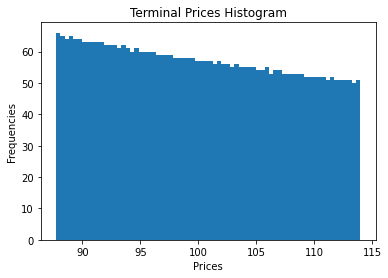

In [8]:
plt.hist(task_2_TV, bins=70)
plt.title('Terminal Prices Histogram')
plt.xlabel('Prices')
plt.ylabel('Frequencies')

In [9]:
task_2_1000, freq_task2_1000 = asset_px_binomial_tree(400, u_total, d_total, S_0)
task_2_1000  = pd.DataFrame(task_2_1000)
terminal_val_task2 = pd.DataFrame(np.vstack([task_2_1000.iloc[:,-1].values,freq_task2_1000]).T, columns = ['Terminal Value', 'Frequency'])

### Part (b) Statistical Distribution of Prices Generated by the Binomial Model

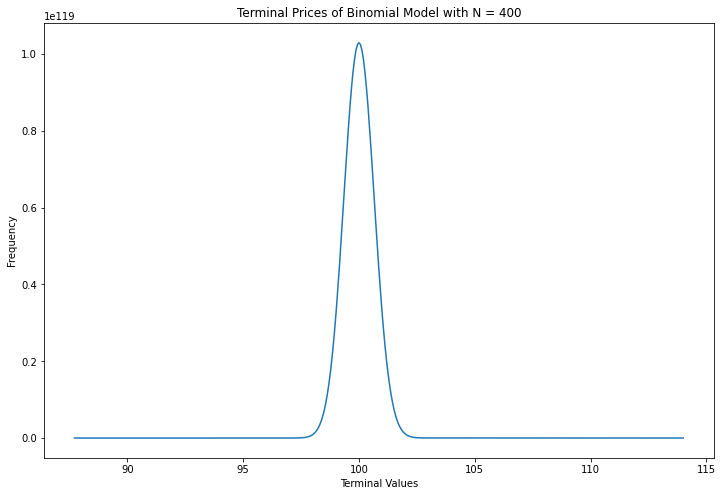

In [10]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(terminal_val_task2['Terminal Value'].values, terminal_val_task2['Frequency'].values, label = 'Terminal Values')
ax.set_xlabel('Terminal Values')
ax.set_ylabel('Frequency')
ax.set_title('Terminal Prices of Binomial Model with N = 400');

### Part (c) Statistical Distribution of Log Returns

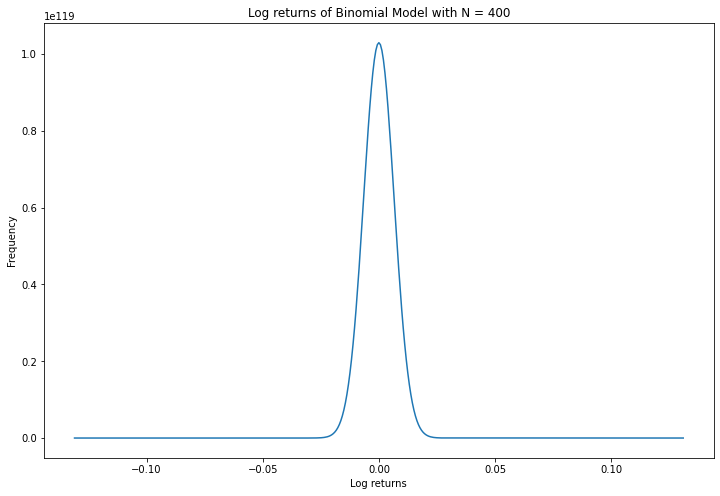

In [11]:
terminal_val_task2['Log Returns'] = np.log(terminal_val_task2['Terminal Value']/100)

fig, ax = plt.subplots(figsize = (12,8))
plt.plot(terminal_val_task2['Log Returns'].values, terminal_val_task2['Frequency'].values, label = 'Log returns')
ax.set_xlabel('Log returns')
ax.set_ylabel('Frequency')
ax.set_title('Log returns of Binomial Model with N = 400');

In [12]:
np.log(task_2[1,1]/task_2[0,0])

-3.275706560166144e-05

In [13]:
np.log(task_2[0,1]/task_2[0,0])

3.275706560164976e-05

In [14]:
task_3, freq_task3 = asset_px_binomial_tree(400, u_total, d_total, S_0)
task_3_TV = terminal_px_extractor(task_3)

(array([46., 43., 43., 41., 41., 39., 38., 37., 37., 36.]),
 array([ 87.71929825,  90.34736842,  92.9754386 ,  95.60350877,
         98.23157895, 100.85964912, 103.4877193 , 106.11578947,
        108.74385965, 111.37192982, 114.        ]),
 <a list of 10 Patch objects>)

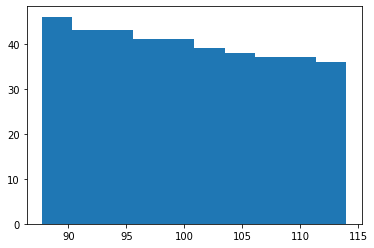

In [15]:
plt.hist(task_3_TV, bins=10)

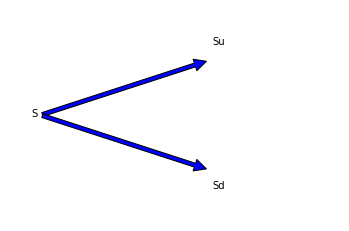

In [16]:
plt.xlim(0,1) 
plt.figtext(0.18,0.5,'S')
plt.figtext(0.6,0.5+0.25,'Su')
plt.figtext(0.6,0.5-0.25,'Sd')

plt.annotate('',xy=(0.6,0.5+0.25), xytext=(0.1,0.5), arrowprops=dict(facecolor='b',shrink=0.01))
plt.annotate('',xy=(0.6,0.5-0.25), xytext=(0.1,0.5), arrowprops=dict(facecolor='b',shrink=0.01))
plt.axis('off')
plt.show()

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figtext(0.08,0.6,"Stock price=$20")
plt.figtext(0.75,0.91,"Stock price=$22")
plt.figtext(0.75,0.87,"Option price=$1")
plt.figtext(0.75,0.28,"Stock price=$18")
plt.figtext(0.75,0.24,"Option price=0")
plt.figtext(0.75,0.24,"Option price=0")
n=1
def bionomial_grid(n):
    G=nx.Graph()
    for i in range(0,n+1):
        for j in range(1,i+2):
            if i<n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j),(i+1,j+1))
    posG={}
    for node in G.node in G.nodes():
        posG[node]=(node[0],n+2+node[0]-2*node[1])
    nx.draw(G,pos=posG)
    return binomial_grid(n)

<Figure size 432x288 with 0 Axes>